# 18.065 Problem Set 4

Due Friday 4/7 at 1pm.

## Problem 1

A "convex set" $S$ is one such that for any two points $x,y$ in $S$, the straight line connecting them is also in $S$.  That is, $\alpha x + (1-\alpha)y \in S$ for all $\alpha \in [0,1]$.

**(a)** If $f_i(x)$ is a [convex function](https://en.wikipedia.org/wiki/Convex_function) (as defined in e.g. lecture 16), explain why the constraint $f_i(x) \le 0$ defines a convex set of feasible points.

**(b)** Explain why the intersection of two convex sets is a convex set.  (Hence, the feasible set for many convex constraints is a convex set.)

## Problem 2

Suppose we are solving the $\ell^1$-regularized least-square problem:
$$
\min_{x\in \mathbb{R}^n} \left( \Vert b - Ax \Vert_2^2 + \lambda \Vert x \Vert_1 \right)
$$
where $\lambda > 0$ is some regularization parameter and $ \Vert x \Vert_1 = \sum_i |x_i|$ is the $\ell^1$ norm.

Similar to the examples in 16, show that this can be converted into a an equivalent [quadratic programming (QP)](https://en.wikipedia.org/wiki/Quadratic_programming) problem — a convex quadratic objective with affine constraints — by introducing one or more dummy variables (an "epigraph" formulation).   This replaces the non-differentiable $\ell^1$ problem with an equivalent *differentiable* problem with *differentiable constraints*.

## Problem 3

Let
$$
A(p) = A_0 + \underbrace{\begin{pmatrix} p_1 & & & \\ & p_2 & & \\ & & \ddots & \\ & & & p_m \end{pmatrix}}_{\text{diagm(p)}}
$$
where $A_0$ is some $m \times m$ matrix and $p \in \mathbb{R}^m$ are $m$ parameters.

Now, suppose we compute
$$
f(p) = g(\underbrace{A(p)^{-1} b}_{x(p)})
$$
where $g(x) = x^T G x$, $b \in \mathbb{R}^m$ is some vector, and $G = G^T$ is some symmetric $m \times m$ matrix.

**(a)** What is $\nabla f$?  Explain how you can compute *all m* components of $\nabla f$ by solving only *two* $m \times m$ systems followed by $\Theta(m)$ additional work in *total*.

**(b)** Implement your solution from (a) by filling in the function `∇f(p)` below, and check that it correctly predicts $df = f(p + dp) - f(p)$ (*approximately*) for a random small $dp$.

In [ ]:
using LinearAlgebra

# some A₀, b, G for m=5
m = 5
A₀ = randn(m,m)
b = randn(m)
G = randn(m,m); G = G' + G

# our functions
g(x) = x' * G * x
f(p) = g((A₀ + Diagonal(p)) \ b)

p = randn(m) # some random parameters
f(p) # make sure it gives a number out

In [ ]:
# your solution to (b):

function ∇f(p)
    ????
end

dp = randn(m) * 1e-8 # a random small dp
df = f(p + dp) - f(p)

# check: ∇f approximately predicts df
# ???

## Problem 4

In class, we considered steepest descent for $f(x) = \kappa x_1^2 + x_2^2$ in $\mathbb{R}^2$, and argued that for an arbitrary $x = [x_1,x_2]$ starting point and $\kappa \gg 1$, the steepest-descent step $x \leftarrow x - sz$ is *approximately* $sz \approx [x_1, x_2/\kappa]$.

**(a)** If $sz = [x_1, x_2/\kappa]$ exactly, then on the next step we would have the new $x \leftarrow x - sz = [0, (1-\frac{1}{\kappa}) x_2)]$.   However, explain why a more careful calculation shows that the new $x - sz \approx [O(1/\kappa^2), x_2-\frac{1}{\kappa} x_2 + O(1/\kappa^3)]$, i.e. the first component is proportional to $1/\kappa^2$ to leading order in $1/\kappa$.

**(b)** If you start with an $x = [\#/\kappa^2, x_2]$, i.e. where the first component is proportional to $1/\kappa^2$ and $\#$ is some number of the same order of magnitude as $x_2$, show that after one steepest-descent step (for $\kappa \gg 1$) the $x_1$ component is *still* roughly order $1/\kappa^2$ but of the opposite sign, and $x_2$ again subtracts a term roughly proportional to $x_2/\kappa$.

**(c)** Implement this steepest-descent process numerically for $\kappa = 100$ and a starting point $x_1 = 0.01234567$ and $x_2 = 0.8910$.  Plot $100x_1$ and $x_2$ for 100 iterations of steepest descent.  A more careful analysis would show a convergence proportional to $\left( \frac{\kappa - 1}{\kappa + 1} \right)^k$, where $k$ is the iteration number, following equation (4) in the Strang book — include this function for comparison on your plot.

## Problem 5

In the Adam algorithm for stochastic optimization, we keep a "running average" ("1st moment") $m^{(k)}$ of the estimated gradients.  If $\tilde{\nabla}f^{(k)}$ is our estimated (mini-batch) gradient at $x^{(k)}$ (the k-th step, for $k=1,2,3,\ldots$), then the running average is computed as:
$$
m^{(k)} = \beta_1 m^{(k-1)} + (1-\beta_1) \tilde{\nabla}f^{(k)} \, ,
$$
where $0 \le \beta_1 < 1$ (typically $\beta_1 = 0.9$) is a given weight, and we define $m^{(0)} = \vec{0}$.

However, before we use the gradient to take a step, we "de-bias" it to:
$$
\hat{m}^{(k)} = \frac{m^{(k)}}{1 - \beta_1^k}
$$
**Explain** why $\hat{m}^{(k)}$ is exactly a weighted average of the estimates $\tilde{\nabla}f^{(j)}$ for $j = 1,\ldots,k$ — that is, explain why dividing by $1 - \beta_1^k$ exactly corresponds to dividing by the sum of the weights of each $\tilde{\nabla}f^{(j)}$ term.  (The formulas for the [sum of a geometric series](https://en.wikipedia.org/wiki/Geometric_series) will be helpful.)

## Problem 6

The Julia notebook from class (lecture 21) implemented the Adam algorithm for stochastic optimization.  This code is reproduced below.

A more recent algorithm, that has better convergence guarantees than Adam, is called [YOGI (Zaheer et al., 2018)](https://papers.nips.cc/paper_files/paper/2018/hash/90365351ccc7437a1309dc64e4db32a3-Abstract.html).   Make a copy of the code below and **modify it to implement the YOGI algorithm** as described in algorithm 2 of the linked paper.  (This algorithm omits the "de-biasing" step of problem 5, but you should include that in your implementation; the de-biasing is identical to that of Adam.)   **Plot the convergence** of YOGI for this problem, with the same hyper-parameters, along with the original Adam algorithms (using different colors superimposed on a single plot).

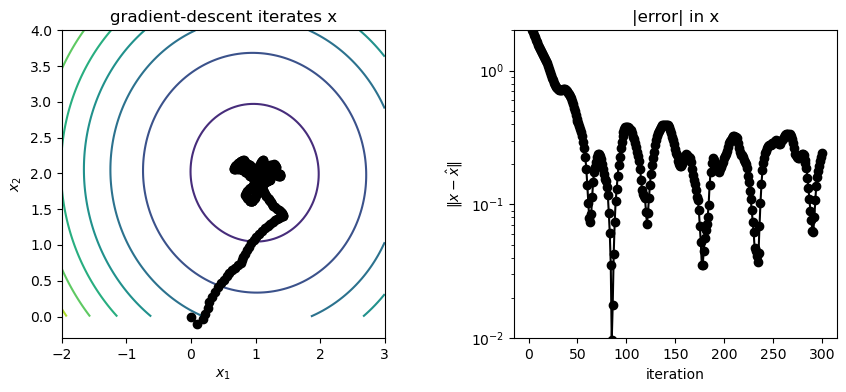

PyObject Text(0.5, 1.0, '|error| in x')

In [1]:
using LinearAlgebra, PyPlot

# typical Adam hyper-parameters
ϵ = 1e-8
β₁ = 0.9
β₂ = 0.999

# more parameters
log₁₀α = -1
α = exp10(log₁₀α) # approx. maximum stepsize |Δx|
M = 1 # mini-batch size
iterations = 300

x̂₀ = [1,2] # ground-truth model
x = [0.0,0.0]
X = [x]
ΔX = [norm(x - x̂₀)]
m = zero(x) # initial 1st-moment (mean gradient)
v = zero(x) # initial 2nd-moment (mean gradient.^2)
for t = 1:iterations
    # generate a mini-batch of size M:
    ã = randn(M)
    b̃ = @. 1 + 2ã + randn()
    Ã = [one.(ã) ã]

    # approximate gradient from this mini-batch
    ∇f̃ = (2/M)*(Ã'*(Ã*x - b̃))

    # Adam update
    m = β₁*m + (1-β₁)*∇f̃
    v = β₂*v + (1-β₂)*(∇f̃.^2)
    m̂ = m / (1 - β₁^t) # de-bias: normalize by total weights
    v̂ = v / (1 - β₂^t) # de-bias: normalize by total weights
    x = @. x - α * m̂ / (√v̂ + ϵ)

    push!(X, x)
    push!(ΔX, norm(x - x̂₀))
end

# objective function for contour plot:
a = randn(1000)
b = @. 1 + 2a + randn()
A = [one.(a) a]
f(x) = norm(b-A*x)^2 / length(b)
f(x1,x2) = f([x1,x2])
x1 = range(-2,3, length=100)
x2 = range(0,4,length=100)
fvals = f.(x1',x2)

# plot progress

figure(figsize=(10,4))

subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
contour(x1', x2, fvals)
plot(x̂₀[1], x̂₀[2], "r*")
plot(getindex.(X,1), getindex.(X,2), "ko-")
xlabel(L"x_1")
ylabel(L"x_2")
title("gradient-descent iterates x")

subplot(1,2,2)
semilogy(ΔX, "ko-")
ylim(1e-2, 2)
xlabel("iteration")
ylabel(L"\Vert x - \hat{x} \Vert")
title("|error| in x")